In [17]:
import sys

sys.path.append('/mnt/sdceph/users/nroy/radmc3d-2.0/python/radmc3dPy')
sys.path.append('/mnt/home/nroy/test/chimes-IGNIS/chimes-driver/ext-lib/pfh_python')

#from simpleplot import *
#from radmc3dPy import image
#from gizmopy.load_from_snapshot import load_from_snapshot
#from gizmopy.load_fire_snap import load_fire_snap
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.facecolor']='w'


params = {"text.color" : 'k',
          "ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k"}

plt.rcParams.update(params)

'''
for generalization, see "#CHANGE" throughout code on lines where needs change depending on emission line instance (ctrl+f tofind and change quickly), most changes should be covered by changing the parent variable below.
''';

In [18]:
''' READ IN OF HDF5 FILE '''
file_151 = h5.File('151_moments_all_lines-vsigma.hdf5', "r")
file_152 = h5.File('152_moments_all_lines-vsigma.hdf5', "r")
file_155 = h5.File('155_moments_all_lines-vsigma.hdf5', "r")

file_151.keys()

<KeysViewHDF5 ['CII_158mu', 'CO_J10', 'Halpha', 'NII_6548A', 'NeIII_15mu', 'NeIII_3869A', 'NeII_12mu', 'NeVI_7mu', 'NeV_14mu', 'NeV_3426A', 'OIII_5007A', 'OIII_88mu', 'OIV_25mu', 'OI_145mu', 'OI_6300A', 'OI_63mu', 'SIII_18mu', 'SII_6716A', 'SII_6731A']>

In [36]:
line = "SII_6731A" # CHANGE for chosen line

moment_0_151 = file_151[line]["M0"][:]
moment_1_151 = file_151[line]["M1"][:]
moment_2_151 = file_151[line]["M2"][:]

moment_0_152 = file_152[line]["M0"][:]
moment_1_152 = file_152[line]["M1"][:]
moment_2_152 = file_152[line]["M2"][:]

moment_0_155 = file_155[line]["M0"][:]
moment_1_155 = file_155[line]["M1"][:]
moment_2_155 = file_155[line]["M2"][:]

In [37]:
'''CALCULATIONS FOR V/SIGMA'''

r = 128 # given 1/2 mass radius
tolerance = 2 # CHANGE depending on accuracy we want
r_range = np.arange(0, 128)

#SNAPSHOT 151 CALC
numerator151 = moment_0_151 * ((moment_1_151)*(moment_1_151))
denominator151 = moment_0_151 * ((moment_2_151)*(moment_2_151))

midpointx151 = len(numerator151) / 2
midpointy151 = len(numerator151[0]) / 2

half_num151 = []
half_denom151 = [] 
for i in range(len(numerator151)):
    for j in range(len(numerator151[i])): 
        x = i - midpointx151
        y = j - midpointy151
        dist = np.sqrt(x**2 + y**2)
        if dist <= r:
            half_num151.append(numerator151[i][j])
            half_denom151.append(denominator151[i][j])
        

v_sigma_sq_151 = (np.sum(half_num151))/(np.sum(half_denom151))

v_sigma_151 = np.sqrt(v_sigma_sq_151)



#NaN Catcher 151
if np.isnan(v_sigma_151):
    if np.isnan(v_sigma_sq_151):
        if np.isnan(np.sum(numerator151)):
            numerator151[np.isnan(numerator151)] = 0
        if np.isnan(np.sum(denominator151)):
            denominator151[np.isnan(denominator151)] = 0
    v_sigma_sq_151 = (np.sum(numerator151))/(np.sum(denominator151))
    v_sigma_151 = np.sqrt(v_sigma_sq_151)


print("Snapshot 151 =", v_sigma_151)

'''
- All of the above is what needs to be done for 151, 152, and 155. 
- condense into one for loop for a snapshot list, then save final v_sigma value in unique variable name
- should be able at some point to read in hdf5 file for each snapshot, pull data from there, and go straight 
    to this calculation
'''

#SNAPSHOT 152 CALC
numerator152 = moment_0_152 * ((moment_1_152)*(moment_1_152))
denominator152 = moment_0_152 * ((moment_2_152)*(moment_2_152))

midpointx152 = len(numerator152) / 2
midpointy152 = len(numerator152[0]) / 2

half_num152 = []
half_denom152 = [] 
for i in range(len(numerator152)):
    for j in range(len(numerator152[i])): 
        x = i - midpointx152
        y = j - midpointy152
        dist = np.sqrt(x**2 + y**2)
        if dist <= r:
            half_num152.append(numerator152[i][j])
            half_denom152.append(denominator152[i][j])

v_sigma_sq_152 = (np.sum(half_num152))/(np.sum(half_denom152))

v_sigma_152 = np.sqrt(v_sigma_sq_152)

#NaN Catcher 152
if np.isnan(v_sigma_152):
    if np.isnan(v_sigma_sq_152):
        if np.isnan(np.sum(numerator152)):
            numerator152[np.isnan(numerator152)] = 0
        if np.isnan(np.sum(denominator152)):
            denominator152[np.isnan(denominator152)] = 0
    v_sigma_sq_152 = (np.sum(numerator152))/(np.sum(denominator152))
    v_sigma_152 = np.sqrt(v_sigma_sq_152)


print("Snapshot 152 =", v_sigma_152)


#SNAPSHOT 155 CALC
numerator155 = moment_0_155 * ((moment_1_155)*(moment_1_155))
denominator155 = moment_0_155 * ((moment_2_155)*(moment_2_155))

midpointx155 = len(numerator155) / 2
midpointy155 = len(numerator155[0]) / 2

half_num155 = []
half_denom155 = [] 
for i in range(len(numerator155)):
    for j in range(len(numerator155[i])): 
        x = i - midpointx155
        y = j - midpointy155
        dist = np.sqrt(x**2 + y**2)
        if dist <= r:
            half_num155.append(numerator155[i][j])
            half_denom155.append(denominator155[i][j])

v_sigma_sq_155 = (np.sum(half_num155))/(np.sum(half_denom155))

v_sigma_155 = np.sqrt(v_sigma_sq_155)

#NaN Catcher 155
if np.isnan(v_sigma_155):
    if np.isnan(v_sigma_sq_155):
        if np.isnan(np.sum(numerator155)):
            numerator155[np.isnan(numerator155)] = 0
        if np.isnan(np.sum(denominator155)):
            denominator155[np.isnan(denominator155)] = 0
    v_sigma_sq_155 = (np.sum(numerator155))/(np.sum(denominator155))
    v_sigma_155 = np.sqrt(v_sigma_sq_155)


print("Snapshot 155 =", v_sigma_155)

Snapshot 151 = 1.0554409908273055
Snapshot 152 = 4.426011895302593
Snapshot 155 = 1.0675521099012157


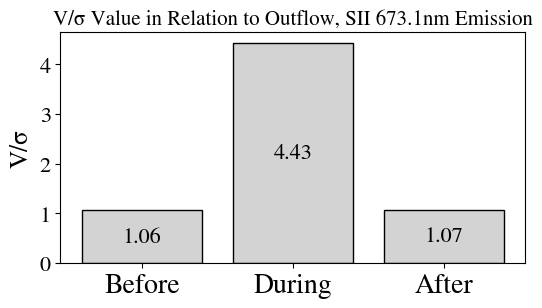

In [38]:
'''PLOTTING'''

x_axis = ['Before', 'During', 'After'] #snapshots

present_151 = round(v_sigma_151, 2)
present_152 = round(v_sigma_152, 2)
present_155 = round(v_sigma_155, 2)

y_axis = [present_151, present_152, present_155] #values

fig, ax = plt.subplots(figsize = (6, 3))
barplot = ax.bar(x = x_axis, height = y_axis, fc = "lightgray", ec = "black")
ax.bar_label(barplot, labels = y_axis, label_type = "center", fontsize = 16)

#for index, value in enumerate(y_axis):
   # plt.text(value, index, str(value))
plt.yticks(fontsize=16)
plt.xticks(fontsize=20)
plt.title('V/σ Value in Relation to Outflow, SII 673.1nm Emission', fontsize = 15) #change
plt.xlabel('', fontsize = 18)
plt.ylabel('V/σ', fontsize = 18)
plt.show()